# Election dataset
Cleaning the elections result and merging with and processing CHES and V-party ratings

https://eu-ned.com/datasets/

https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/IQRYP5

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [3]:
# Refference clean dataset

d = pd.read_csv("datasets/eu_ned_national_nuts2.csv")
d.describe()

,nutslevel,year,partyfacts_id,partyvote,electorate,totalvote,validvote
count,21797.000000,21797.000000,18110.000000,2.179700e+04,2.174200e+04,2.010900e+04,2.179700e+04
mean,1.997339,2006.340093,1495.594313,1.005529e+05,1.392373e+06,1.000656e+06,9.633162e+05
std,0.051517,8.737185,1601.355841,1.857418e+05,1.190968e+06,9.424130e+05,8.894868e+05
min,1.000000,1983.000000,4.000000,0.000000e+00,1.153900e+04,5.623000e+03,5.472000e+03
25%,2.000000,2000.000000,573.000000,9.261000e+03,6.596350e+05,4.149130e+05,4.179600e+05
50%,2.000000,2007.000000,1231.000000,3.322900e+04,1.077517e+06,7.383690e+05,7.239660e+05
75%,2.000000,2014.000000,1637.000000,1.109630e+05,1.740091e+06,1.198248e+06,1.144181e+06
max,2.000000,2020.000000,8653.000000,4.521325e+06,1.055969e+07,9.304207e+06,9.438593e+06


In [4]:
# Using the dataset with only national elections and already on NUTS 2 level
# Slovenia only on NUTS 1
# The other available dataset is on NUTS 3, unnecessary for us

df = pd.read_csv("datasets/eu_ned_national_nuts2.csv")
df

,country,country_code,nutslevel,nuts2,regionname,type,year,party_abbreviation,party_english,party_native,partyfacts_id,partyvote,electorate,totalvote,validvote
0,Austria,AT,2,AT11,Burgenland,Parliament,1990,FPO,Freedom Party of Austria,Freiheitliche Partei Osterreichs,463.0,19508.0,205541.0,181855.0,176831.0
1,Austria,AT,2,AT11,Burgenland,Parliament,1990,GRUNE,The Greens -- The Green Alternative,Die Grunen - Die grune Alternative,1659.0,4122.0,205541.0,181855.0,176831.0
2,Austria,AT,2,AT11,Burgenland,Parliament,1990,OTHER,NaN,NaN,NaN,465.0,205541.0,181855.0,176831.0
3,Austria,AT,2,AT11,Burgenland,Parliament,1990,OVP,Austrian People's Party,Osterreichische Volkspartei,1329.0,62675.0,205541.0,181855.0,176831.0
4,Austria,AT,2,AT11,Burgenland,Parliament,1990,SPO,Social Democratic Party of Austria,Sozialdemokratische Partei Osterreichs,1384.0,88547.0,205541.0,181855.0,176831.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21792,United Kingdom,GB,2,UKN0,Northern Ireland,Parliament,2019,GREENS,Green Party of England and Wales,Green Party of England and Wales,1794.0,1996.0,1293971.0,NaN,799035.0
21793,United Kingdom,GB,2,UKN0,Northern Ireland,Parliament,2019,OTHER,NaN,NaN,NaN,19650.0,1293971.0,NaN,799035.0
21794,United Kingdom,GB,2,UKN0,Northern Ireland,Parliament,2019,SDLP,NaN,NaN,762.0,118737.0,1293971.0,NaN,799035.0
21795,United Kingdom,GB,2,UKN0,Northern Ireland,Parliament,2019,SF,NaN,NaN,963.0,181853.0,1293971.0,NaN,799035.0


In [5]:
# Limit to arbitrary time range, in our case 2010 to 2020 (code says 2023 but
#   dataset goes only until 2020)

df = df[(df["year"] >= 2010) & (df["year"] <= 2023)]

In [6]:
df["country_code"].unique()

array(['AT', 'BE', 'BG', 'HR', 'CY', 'CZ', 'DK', 'EE', 'FI', 'FR', 'DE',
       'GR', 'HU', 'IE', 'IT', 'LV', 'LT', 'LU', 'MT', 'NL', 'NO', 'PL',
       'PT', 'RO', 'SK', 'SI', 'ES', 'SE', 'CH', 'TR', 'GB'], dtype=object)

In [7]:
# Remove countries that do not interest us

df = df[~(df["country_code"].isin(["GB", "CH", "NO", "TR"]))]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7217 entries, 41 to 18414
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             7217 non-null   object 
 1   country_code        7217 non-null   object 
 2   nutslevel           7217 non-null   int64  
 3   nuts2               7180 non-null   object 
 4   regionname          7180 non-null   object 
 5   type                7217 non-null   object 
 6   year                7217 non-null   int64  
 7   party_abbreviation  7217 non-null   object 
 8   party_english       5244 non-null   object 
 9   party_native        5244 non-null   object 
 10  partyfacts_id       5737 non-null   float64
 11  partyvote           7217 non-null   float64
 12  electorate          7204 non-null   float64
 13  totalvote           7204 non-null   float64
 14  validvote           7217 non-null   float64
dtypes: float64(5), int64(2), object(8)
memory usage: 902.1+ KB

In [9]:
df["nutslevel"].unique()

array([2, 1])

In [10]:
df["nutslevel"].value_counts()

nutslevel
2    7180
1      37
Name: count, dtype: int64

In [11]:
# Adding a NUTS1 code to Slovenia simplify data processing

df.loc[(df["nutslevel"] == 1), "nuts2"] = "SI0"

In [12]:
# Check for Slovenia

df[(df["nutslevel"] == 1) & (df["country"] == "Slovenia")]

,country,country_code,nutslevel,nuts2,regionname,type,year,party_abbreviation,party_english,party_native,partyfacts_id,partyvote,electorate,totalvote,validvote
16264,Slovenia,SI,1,SI0,NaN,Parliament,2011,DESUS,Democratic Party of Retired People of Slovenia,Demokraticna stranka upokojencev Slovenije,467.0,76853.0,1709692.0,1121475.0,1102256.0
16265,Slovenia,SI,1,SI0,NaN,Parliament,2011,LDS,Liberal Democracy of Slovenia,Liberalna demokracija Slovenije,975.0,16268.0,1709692.0,1121475.0,1102256.0
16266,Slovenia,SI,1,SI0,NaN,Parliament,2011,LGV,Civic List,Drzavljanska lista,98.0,92282.0,1709692.0,1121475.0,1102256.0
16267,Slovenia,SI,1,SI0,NaN,Parliament,2011,LZJPS,Zoran Jankovic's List  Positive Slovenia,Lista Zorana Jankovica - Pozitivna Slovenija,1773.0,314273.0,1709692.0,1121475.0,1102256.0
16268,Slovenia,SI,1,SI0,NaN,Parliament,2011,NSI,New Slovenia -- Christian People's Party,Nova Slovenija - Krscanska ljudska stranka,1618.0,53758.0,1709692.0,1121475.0,1102256.0
16269,Slovenia,SI,1,SI0,NaN,Parliament,2011,OTHER,NaN,NaN,NaN,35577.0,1709692.0,1121475.0,1102256.0
16270,Slovenia,SI,1,SI0,NaN,Parliament,2011,SD,Social Democrats / United List of Social Democ...,Socialni demokrati / Zdruzena lista socialnih ...,1403.0,115952.0,1709692.0,1121475.0,1102256.0
16271,Slovenia,SI,1,SI0,NaN,Parliament,2011,SDS,Slovenian Democratic Party,Slovenska demokratska stranka,472.0,288719.0,1709692.0,1121475.0,1102256.0
16272,Slovenia,SI,1,SI0,NaN,Parliament,2011,SLS,Slovenian People's Party,Slovenska ljudska stranka,764.0,75311.0,1709692.0,1121475.0,1102256.0
16273,Slovenia,SI,1,SI0,NaN,Parliament,2011,SNS,Slovenian National Party,Slovenska nacionalna stranka,96.0,19786.0,1709692.0,1121475.0,1102256.0


In [13]:
df.columns

Index(['country', 'country_code', 'nutslevel', 'nuts2', 'regionname', 'type',
       'year', 'party_abbreviation', 'party_english', 'party_native',
       'partyfacts_id', 'partyvote', 'electorate', 'totalvote', 'validvote'],
      dtype='object')

### Aggregating to NUTS0 and NUTS1 (treating valid votes)

In [14]:
# We add columns stripped to NUTS 0 and NUTS 1 so we can aggregate. We need to
#   aggregate since our target dataset includes NUTS 0,1, and 2.
# We assume that the dataset is complete, includes all the NUTS2 regions
#   (confirmed with a few random checks)

df['nuts0'] = df['nuts2'].str[:2]  # Country Code
df['nuts1'] = df['nuts2'].str[:3]  # NUTS 1 Code

In [15]:
# Extracting Region-Year combinations (getting rid of duplicates caused by
#   many parties)
unique_regions = df[['country', 'year', 'nuts2', 'nuts1', 'nuts0', 'validvote']].drop_duplicates()

# Calculate NUTS 1 Valid Votes, we can sum() since we removed duplicates
validvotes_nuts1 = unique_regions.groupby(['country', 'year', 'nuts1'])['validvote'].sum().reset_index()
validvotes_nuts1.rename(columns={'validvote': 'nuts1_validvote'}, inplace=True)

# Calculate NUTS 0 Valid Votes (Country Level)
validvotes_nuts0 = unique_regions.groupby(['country', 'year', 'nuts0'])['validvote'].sum().reset_index()
validvotes_nuts0.rename(columns={'validvote': 'nuts0_validvote'}, inplace=True)

In [16]:
validvotes_nuts1

,country,year,nuts1,nuts1_validvote
0,Austria,2013,AT1,1997564.0
1,Austria,2013,AT2,1039164.0
2,Austria,2013,AT3,1656179.0
3,Austria,2017,AT1,2145841.0
4,Austria,2017,AT2,1108923.0
...,...,...,...,...
256,Sweden,2014,SE2,2697918.0
257,Sweden,2014,SE3,1137785.0
258,Sweden,2018,SE1,2519829.0
259,Sweden,2018,SE2,2805751.0


### Solving missing IDs and mismatches
Manual work based mostly on diagnostics bellow and partyfacts-ches conversion table
**Main issues:**
- many unique coallitions which change from region to region, many of them not in PF/CHES/VPARTY
- if possible, coallitions matched to one of the partners (senior one, if able to say)
- small regional parties also missing from PF/CHES/VPARTY or present but no scores

In [17]:
df[(df['partyfacts_id'].isna())]

,country,country_code,nutslevel,nuts2,regionname,type,year,party_abbreviation,party_english,party_native,partyfacts_id,partyvote,electorate,totalvote,validvote,nuts0,nuts1
47,Austria,AT,2,AT11,Burgenland,Parliament,2013,OTHER,NaN,NaN,NaN,1317.0,232505.0,192486.0,188384.0,AT,AT1
53,Austria,AT,2,AT11,Burgenland,Parliament,2017,OTHER,NaN,NaN,NaN,2511.0,232740.0,196577.0,194630.0,AT,AT1
59,Austria,AT,2,AT11,Burgenland,Parliament,2019,JETZT,NaN,NaN,NaN,2351.0,233182.0,189911.0,187061.0,AT,AT1
61,Austria,AT,2,AT11,Burgenland,Parliament,2019,OTHER,NaN,NaN,NaN,1488.0,233182.0,189911.0,187061.0,AT,AT1
112,Austria,AT,2,AT12,Niederösterreich,Parliament,2013,OTHER,NaN,NaN,NaN,7411.0,1278675.0,1036180.0,1013998.0,AT,AT1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17868,Spain,ES,2,ES70,Canarias,Parliament,2019,ECP-GUANYEM EL CANVI,NaN,NaN,NaN,0.0,1726866.0,957376.0,947507.0,ES,ES7
17870,Spain,ES,2,ES70,Canarias,Parliament,2019,ERC-SOBIRANISTES,NaN,NaN,NaN,0.0,1726866.0,957376.0,947507.0,ES,ES7
17872,Spain,ES,2,ES70,Canarias,Parliament,2019,MAS PAIS-EQUO,NaN,NaN,NaN,14972.0,1726866.0,957376.0,947507.0,ES,ES7
17873,Spain,ES,2,ES70,Canarias,Parliament,2019,OTHER,NaN,NaN,NaN,10276.0,1726866.0,957376.0,947507.0,ES,ES7


In [18]:
patch_dict = {
    "C'S": 3217,              # Ciudadanos (Spain)
    "KO": 1117,               # Civic Coalition (Poland)!!! NOT LINKED TO CHES YET - MANUALLY --> Recode to Platforma Obywatelska
    "PODEMOS-IU-EQUO": 3203,  # Unidas Podemos (Spain) -> Mapped to Podemos
    "PODEMOS-IU": 3203,       # Unidas Podemos (Spain) -> Mapped to Podemos
    "PPD/PSD.CDS-PP": 1359,   # Portugal Ahead/AD -> Mapped to PSD (Prime Minister)
    "ERC-CATSI": 848,         # Esquerra Republicana (Catalonia)
    "ERC-SOBIRANISTES": 848,  # Esquerra Republicana (Catalonia)
    "ZL": 57,                 # United Left (Poland) -> Mapped to SLD (Senior Partner)
    "EAJ-PNV": 1637,          # Basque Nationalist Party
    # --- SPAIN (Podemos & Regional Coalitions) ---
    "PODEMOS-COM": 3203,            # En Comú Podem -> Podemos
    "PODEMOS-COMPROMIS-EUPV": 3203, # A la valenciana -> Podemos (Senior Partner)
    "ECP-GUANYEM EL CANVI": 3203,   # En Comú Podem -> Podemos
    "PODEMOS-EN": 3203,             # Podemos (General)
    "PODEMOS-EN MAREA-ANOVA-EU": 3203, # En Marea -> Podemos
    "PODEMOS-EU": 3203,             # Podemos-EU
    "IU-UPEC": 247,                 # Izquierda Unida (United Left)
    "DL": 4795,                     # Democràcia i Llibertat -> CDC/Convergència
    "CUP-PR": 8357,                 # CUP, Popular Unity Candidacy (Catalonia) !! NOT IN CHES LOOKUP
    "MES COMPROMIS": 5623,          # Compromis (Valencia) !! NOT IN CHES LOOKUP

    # --- FRANCE ---
    "MDM": 496,                     # MoDem (Mouvement démocrate) !! NOT IN CHES LOOKUP

    # --- GREECE ---
    "PASOK.DIMAR": 1468,             # PASOK-DIMAR -> Maps to PASOK
    
    # --- France ---
    # Center for France = Mouvement démocrate
    "CEN": 496,
    # --- ITALY (Valle d'Aosta 2018 Fixes) ---
    "PD-UV-UVP-EPAV": 802,        # Map to PD (Partito Democratico)
    "FI -FRAT. D'IT. -MOV.NUOVA VALLE D'AOSTA": 1626, # Map to Forza Italia
    "GRANDE SUD - MPA": 279,       # MpA, Movement for Autonomies
    
    # --- POLAND ---
    #"BS": 7566,                    # Bezpartyjni Samorządowcy (Nonpartisans) not in partyfacts
    
    # --- SPAIN (Tail) ---
    "MAS PAIS-EQUO": 8395,         # Más País
    "UNIO.CAT": 4796,               # Unió (Catalonia)
    #"PRC": 278,                    # Regionalist Party of Cantabria, could not find
    "NOS": 1011,                   # Galician Candidacy, right-wing coalition
    
    # --- ITALY (Tail) ---
    "LA DESTRA": 8188,             # The Right
    "UNION VALDOTAINE PROGRESSISTE": 548,
    
    # --- GREECE (Tail) ---
    "PLEFSI ELEFTHERIAS": 9088,
}

for abbr, pid in patch_dict.items():
    # Only update where ID is missing
    mask = (df['party_abbreviation'] == abbr) & (df['partyfacts_id'].isnull())
    df.loc[mask, 'partyfacts_id'] = pid

ches_patch = {
    # ------- CHES FIXES --------
    "FIDESZ-KDNP": 1691,           # HU: Map to Fidesz
    "USL": 120,                    # RO: Coalition, Map to PSD
    "KUKURIKU": 1475,              # HR: Coalition, Map to SDP
    "UNITY": 1408,                 # HU: Coalition, Map to MSZP
    "SVP - PATT": 1369,            # IT: Mapped to SVP
    "IL POPOLO DELLA LIBERTA'": 1626, # IT: Mapped to FI
    "LITHUANIAN PEASANT AND GREENS UNION": 1490, # LI
    "ARD": 1715,                   # RO: Coalition, Map to PDL
    "DIE FREIHEITLICHEN": 463,     # ITA: Very close to FPO in AUT
    "FORZA ITALIA": 1626,          # ITA: Forza Italia CHES fix
    "NA!": 1704,                   # LAT: CHES code fix
    "CD&V": 604,                   # BEL: CHES code fix
}

for abbr, new_id in ches_patch.items():
    df.loc[df['party_abbreviation'] == abbr, 'partyfacts_id'] = new_id

df.loc[(df['party_abbreviation'] == "LR") & (df['country'] == "France"), 'partyfacts_id'] = 1595 # LR in France remapped to match CHES

In [19]:
# Overseas French regions with many regional small parties not present in CHES/VPARTY
#   Removed due to low number of results.

df = df[~df['nuts2'].str.startswith('FRY', na=False)]

In [20]:
# Aggregate partyvotes for NUTS 0 and NUTS 1 for given elections

aggregations = {
    'partyvote': 'sum',
    'party_abbreviation': 'first',
    'party_english': 'first'
}

party_votes_nuts0 = df.groupby(['country', 'year', 'nuts0', 'partyfacts_id'], as_index=False).agg(aggregations)
party_votes_nuts1 = df.groupby(['country', 'year', 'nuts1', 'partyfacts_id'], as_index=False).agg(aggregations)

party_votes_nuts0['party_english'] = party_votes_nuts0['party_english'].fillna(party_votes_nuts0['party_abbreviation'])
party_votes_nuts1['party_english'] = party_votes_nuts1['party_english'].fillna(party_votes_nuts1['party_abbreviation'])

In [21]:
party_votes_nuts0

,country,year,nuts0,partyfacts_id,partyvote,party_abbreviation,party_english
0,Austria,2013,AT,463.0,962313.0,FPO,Freedom Party of Austria
1,Austria,2013,AT,599.0,165746.0,BZO,Alliance for the Future of Austria
2,Austria,2013,AT,996.0,48175.0,KPO,Communist Party of Austria
3,Austria,2013,AT,1329.0,1125876.0,OVP,Austrian People's Party
4,Austria,2013,AT,1384.0,1258605.0,SPO,Social Democratic Party of Austria
...,...,...,...,...,...,...,...
768,Sweden,2018,SE,690.0,1284698.0,M,General Electoral League / The Right / Right W...
769,Sweden,2018,SE,830.0,518454.0,VP,Left Party / Communist Party
770,Sweden,2018,SE,1274.0,355546.0,FP,Liberal People's Party / The Liberals
771,Sweden,2018,SE,1887.0,99137.0,OTHER,other


In [22]:
# Merge NUTS 1 partyvotes with validvotes
df_nuts1 = pd.merge(party_votes_nuts1, validvotes_nuts1, on=['country', 'year', 'nuts1'], how='left')

# Merge NUTS 0 partyvotes with validvotes
df_nuts0 = pd.merge(party_votes_nuts0, validvotes_nuts0, on=['country', 'year', 'nuts0'], how='left')

In [23]:
# Check across all the datasets datasets (cheks out with Wikipedia)

print("Original Total Valid Vote (DE 2013):", df[(df['country']=='Germany') & (df['year']==2013)]['validvote'].unique().sum())
print("NUTS 1 Total Valid Vote (DE 2013):", df_nuts1[(df_nuts1['country']=='Germany') & (df_nuts1['year']==2013)]['nuts1_validvote'].unique().sum())
print("NUTS 0 Total Valid Vote (DE 2013):", df_nuts0[(df_nuts0['country']=='Germany') & (df_nuts0['year']==2013)]['nuts0_validvote'].unique().sum())

Original Total Valid Vote (DE 2013): 43726856.0
NUTS 1 Total Valid Vote (DE 2013): 43726856.0
NUTS 0 Total Valid Vote (DE 2013): 43726856.0


In [24]:
df_nuts0[df_nuts0["nuts0"] == "SI"]

,country,year,nuts0,partyfacts_id,partyvote,party_abbreviation,party_english,nuts0_validvote
664,Slovenia,2011,SI,96.0,19786.0,SNS,Slovenian National Party,1102256.0
665,Slovenia,2011,SI,98.0,92282.0,LGV,Civic List,1102256.0
666,Slovenia,2011,SI,467.0,76853.0,DESUS,Democratic Party of Retired People of Slovenia,1102256.0
667,Slovenia,2011,SI,472.0,288719.0,SDS,Slovenian Democratic Party,1102256.0
668,Slovenia,2011,SI,764.0,75311.0,SLS,Slovenian People's Party,1102256.0
669,Slovenia,2011,SI,975.0,16268.0,LDS,Liberal Democracy of Slovenia,1102256.0
670,Slovenia,2011,SI,1015.0,13477.0,TRS,Party for Sustainable Development of Slovenia,1102256.0
671,Slovenia,2011,SI,1403.0,115952.0,SD,Social Democrats / United List of Social Democ...,1102256.0
672,Slovenia,2011,SI,1618.0,53758.0,NSI,New Slovenia -- Christian People's Party,1102256.0
673,Slovenia,2011,SI,1773.0,314273.0,LZJPS,Zoran Jankovic's List  Positive Slovenia,1102256.0


In [25]:
# Filter out NUTS 1 Slovenia from df, where we only keep NUTS 2 and order columns

df = df[~(df["nutslevel"] == 1)][["country", "year", "nuts2", "partyfacts_id", "partyvote", "party_abbreviation", "party_english", "validvote"]]

In [26]:
df

,country,year,nuts2,partyfacts_id,partyvote,party_abbreviation,party_english,validvote
41,Austria,2013,AT11,599.0,3689.0,BZO,Alliance for the Future of Austria,188384.0
42,Austria,2013,AT11,463.0,32705.0,FPO,Freedom Party of Austria,188384.0
43,Austria,2013,AT11,1971.0,11050.0,FRANK,Team Stronach,188384.0
44,Austria,2013,AT11,1659.0,12718.0,GRUNE,The Greens -- The Green Alternative,188384.0
45,Austria,2013,AT11,996.0,930.0,KPO,Communist Party of Austria,188384.0
...,...,...,...,...,...,...,...,...
18410,Sweden,2018,SE33,456.0,11529.0,MP,Greens,345515.0
18411,Sweden,2018,SE33,1887.0,5165.0,OTHER,other,345515.0
18412,Sweden,2018,SE33,487.0,137690.0,SAP,Social Democrats / Social Democratic Workers' ...,345515.0
18413,Sweden,2018,SE33,409.0,45847.0,SD,Sweden Democrats,345515.0


## Filtering with Region_ID
to focus on our 151 regions of interest

In [27]:
# Get lists of our regions of interest based on NUTS level

target_regions_df = pd.read_csv('./datasets/clean/regs.csv')
all_target_ids = target_regions_df['Region_ID'].unique()

target_nuts0 = [x for x in all_target_ids if len(str(x)) == 2]
target_nuts1 = [x for x in all_target_ids if len(str(x)) == 3]
target_nuts2 = [x for x in all_target_ids if len(str(x)) >= 4]

print(f"Targets found: NUTS0: {len(target_nuts0)}, NUTS1: {len(target_nuts1)}, NUTS2: {len(target_nuts2)}")

Targets found: NUTS0: 27, NUTS1: 22, NUTS2: 102


In [28]:
# Keep only the NUTS in the elections datasets that are of our interest

# --- Process NUTS 2 (df) ---
subset_nuts2 = df[df['nuts2'].isin(target_nuts2)].copy()
subset_nuts2 = subset_nuts2.rename(columns={'nuts2': 'Region_ID', 'validvote': 'valid_vote_agg'})
cols_to_keep = ['country', 'year', 'Region_ID', 'partyfacts_id', 'party_abbreviation', 'party_english', 'partyvote', 'valid_vote_agg']
subset_nuts2 = subset_nuts2[cols_to_keep]

# --- Process NUTS 1 (df_nuts1) ---
subset_nuts1 = df_nuts1[df_nuts1['nuts1'].isin(target_nuts1)].copy()
subset_nuts1 = subset_nuts1.rename(columns={'nuts1': 'Region_ID', 'nuts1_validvote': 'valid_vote_agg'})
subset_nuts1 = subset_nuts1[cols_to_keep]

# --- Process NUTS 0 (df_nuts0) ---
subset_nuts0 = df_nuts0[df_nuts0['nuts0'].isin(target_nuts0)].copy()
subset_nuts0 = subset_nuts0.rename(columns={'nuts0': 'Region_ID', 'nuts0_validvote': 'valid_vote_agg'})
subset_nuts0 = subset_nuts0[cols_to_keep]

In [29]:
# Merge all the 3 level datasets into one

master_election_df = pd.concat([subset_nuts2, subset_nuts1, subset_nuts0], ignore_index=True)

In [30]:
print(f"Final dataset shape: {master_election_df.shape}")
print(f"Unique regions covered: {master_election_df['Region_ID'].nunique()}")

Final dataset shape: (4230, 8)
Unique regions covered: 146


In [31]:
# Check which IDs are missing from our election dataset

set(all_target_ids) - set(master_election_df['Region_ID'].unique())

{'FI2', 'FRY1', 'FRY2', 'FRY3', 'FRY4'}

In [32]:
# Check the raw rows for Åland (FI20) (all the parties labeled "OTHER", not much we can do)
aland_data = df[df['nuts2'] == 'FI20']

# See if the IDs are missing
print(aland_data[['party_english', 'partyfacts_id', 'partyvote']].head())

# specific check for missing IDs
print("Missing IDs count:", aland_data['partyfacts_id'].isna().sum())

     party_english  partyfacts_id  partyvote
3351           NaN            NaN    10503.0
3352           NaN            NaN    12187.0
3353           NaN            NaN    13076.0
Missing IDs count: 3


### Treating missing IDs

**(Fixes implemeneted above in df patch)**

What is seen bellow is after the fix.

In [33]:
master_election_df[master_election_df["partyfacts_id"].isnull()]

,country,year,Region_ID,partyfacts_id,party_abbreviation,party_english,partyvote,valid_vote_agg
6,France,2012,FR10,NaN,OTHER,NaN,66053.0,3890489.0
22,France,2017,FR10,NaN,OTHER,NaN,36288.0,3511021.0
38,France,2012,FRB0,NaN,OTHER,NaN,11281.0,1056975.0
54,France,2017,FRB0,NaN,OTHER,NaN,3196.0,909430.0
68,France,2012,FRC1,NaN,OTHER,NaN,9973.0,692809.0
...,...,...,...,...,...,...,...,...
2670,Spain,2019,ES53,NaN,OTHER,NaN,1892.0,454199.0
2681,Spain,2011,ES61,NaN,OTHER,NaN,155836.0,4357743.0
2691,Spain,2015,ES61,NaN,OTHER,NaN,77778.0,4451503.0
2703,Spain,2016,ES61,NaN,OTHER,NaN,39346.0,4253338.0


In [34]:
master_election_df[master_election_df["party_abbreviation"] == "CD&V"]

,country,year,Region_ID,partyfacts_id,party_abbreviation,party_english,partyvote,valid_vote_agg
2946,Belgium,2010,BE1,604.0,CD&V,Christian-Democrat and Flemish / New Flemish A...,43037.0,709324.0
2958,Belgium,2010,BE2,604.0,CD&V,Christian-Democrat and Flemish / New Flemish A...,664949.0,3812595.0
2973,Belgium,2014,BE1,604.0,CD&V,Christian-Democrat and Flemish / New Flemish A...,8173.0,498725.0
2986,Belgium,2014,BE2,604.0,CD&V,Christian-Democrat and Flemish / New Flemish A...,774867.0,4171869.0
3001,Belgium,2019,BE1,604.0,CD&V,Christian-Democrat and Flemish / New Flemish A...,6580.0,501459.0
3012,Belgium,2019,BE2,604.0,CD&V,Christian-Democrat and Flemish / New Flemish A...,595940.0,4206305.0
3486,Belgium,2010,BE,604.0,CD&V,Christian-Democrat and Flemish / New Flemish A...,707986.0,6527367.0
3498,Belgium,2014,BE,604.0,CD&V,Christian-Democrat and Flemish / New Flemish A...,783040.0,6744547.0
3511,Belgium,2019,BE,604.0,CD&V,Christian-Democrat and Flemish / New Flemish A...,602520.0,6780538.0


In [35]:
# MOST MISSING VOTES PER PARTY

# Filter for the missing rows
missing_ids = master_election_df[master_election_df["partyfacts_id"].isnull()]

print("Top 10 parties with missing IDs:")
print(missing_ids.groupby('party_abbreviation')['partyvote'].sum().sort_values(ascending=False).head(10))

# How much of the vote do they represent per election
missing_share = missing_ids.groupby(['Region_ID', 'year'])['partyvote'].sum() / master_election_df.groupby(['Region_ID', 'year'])['valid_vote_agg'].first()

print("\nMax vote share of missing IDs in any single region-election:")
print(missing_share.max())

print("\nAverage vote share of missing IDs:")
print(missing_share.mean())

Top 10 parties with missing IDs:
party_abbreviation
OTHER                       5051119.0
INDEPENDENT                  357251.0
BS                           118407.0
PRC                           68830.0
IL                            62631.0
BNG-NOS                       45252.0
IL POPOLO DELLA FAMIGLIA      34774.0
MES                           33877.0
INDIPENDENZA VENETA           33274.0
M PAIS-CHA-EQUO               23196.0
Name: partyvote, dtype: float64

Max vote share of missing IDs in any single region-election:
0.2398071417809251

Average vote share of missing IDs:
0.02404129668504531


In [36]:
# WORST REGION (full of small regional parties)

# Calculate missing share per region-year
missing_share = master_election_df[master_election_df['partyfacts_id'].isnull()] \
    .groupby(['Region_ID', 'year'])['partyvote'].sum() \
    / master_election_df.groupby(['Region_ID', 'year'])['valid_vote_agg'].first()

# Find the worst offender
worst_region_year = missing_share.idxmax()
worst_value = missing_share.max()

print(f"The spike is in: {worst_region_year} with {worst_value:.4f} missing share.")

# Show us the rows for that specific region/year to see WHO is missing
print(master_election_df[
    (master_election_df['Region_ID'] == worst_region_year[0]) & 
    (master_election_df['year'] == worst_region_year[1])
][['party_english', 'party_abbreviation', 'partyvote', 'partyfacts_id']])

The spike is in: ('ITC2', 2018) with 0.2398 missing share.
           party_english                        party_abbreviation  partyvote  \
1214                 NaN                          CASAPOUND ITALIA     1205.0   
1215                 NaN  FI -FRAT. D'IT. -MOV.NUOVA VALLE D'AOSTA     5533.0   
1216        North League                                 LEGA NORD    11588.0   
1217  Five Star Movement                        MOVIMENTO 5 STELLE    15999.0   
1218                 NaN                      PARTITO VALORE UMANO     1175.0   
1219                 NaN                            PD-UV-UVP-EPAV    14429.0   
1220                 NaN                         POTERE AL POPOLO!     1700.0   
1221                 NaN             POUR TOUS PER TUTTI PE TCHEUT    12118.0   
1222                 NaN                           RISPOSTA CIVICA     2623.0   

      partyfacts_id  
1214         8244.0  
1215         1626.0  
1216         1221.0  
1217         2046.0  
1218            NaN 

In [37]:
# Final elections DF

master_election_df

,country,year,Region_ID,partyfacts_id,party_abbreviation,party_english,partyvote,valid_vote_agg
0,France,2012,FR10,1898.0,AUT,other,22524.0,3890489.0
1,France,2012,FR10,496.0,CEN,NaN,86586.0,3890489.0
2,France,2012,FR10,5953.0,ECO,Ecology Today,14001.0,3890489.0
3,France,2012,FR10,4363.0,FG,Left Front,332971.0,3890489.0
4,France,2012,FR10,433.0,FN,National Front / National Rally,396094.0,3890489.0
...,...,...,...,...,...,...,...,...
4225,Sweden,2018,SE,690.0,M,General Electoral League / The Right / Right W...,1284698.0,6476725.0
4226,Sweden,2018,SE,830.0,VP,Left Party / Communist Party,518454.0,6476725.0
4227,Sweden,2018,SE,1274.0,FP,Liberal People's Party / The Liberals,355546.0,6476725.0
4228,Sweden,2018,SE,1887.0,OTHER,other,99137.0,6476725.0


In [38]:
# Region-Year-Party missing partyfacts ID

len(master_election_df[master_election_df["partyfacts_id"].isnull()])

281

## CHES integration

In [39]:
ches = pd.read_csv("./datasets/clean/ches-clean.csv")

In [40]:
ches

,partyfacts_id,year_ches,country_ches,party_name_short,vote_perc_ches,electionyear,govt,family,eu_position,lrgen,lrecon,people_vs_elite
0,500.0,2010,BEL,PS,13.70,2010,1.0,5,6.200000,2.500000,2.571429,NaN
1,500.0,2014,BEL,PS,11.70,2014,0.5,5,6.000000,2.600000,2.400000,NaN
2,500.0,2019,BEL,PS,9.46,2019,0.0,5,6.083333,2.083333,2.250000,3.363636
3,1680.0,2010,BEL,SP,9.24,2010,0.0,5,6.066667,3.428571,3.200000,NaN
4,1680.0,2014,BEL,SP,8.80,2014,0.5,5,6.000000,3.000000,2.800000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
716,3117.0,2019,CYP,SYM,6.01,2016,0.0,8,5.000000,4.500000,4.500000,3.500000
717,4883.0,2019,CYP,KINHMA,5.24,2016,0.0,2,5.000000,7.000000,7.000000,5.500000
718,1013.0,2019,CYP,ELAM,3.71,2016,0.0,1,3.500000,10.000000,7.500000,6.500000
719,1013.0,2024,CYP,ELAM,6.78,2021,NaN,1,4.000000,9.400000,4.600000,5.000000


In [41]:
ches.columns

Index(['partyfacts_id', 'year_ches', 'country_ches', 'party_name_short',
       'vote_perc_ches', 'electionyear', 'govt', 'family', 'eu_position',
       'lrgen', 'lrecon', 'people_vs_elite'],
      dtype='object')

In [42]:
# --- STEP 1: CREATE THE LOOKUP TABLE ---
# We only need to figure out the scores for each party in each ELECTION YEAR once.
unique_party_elections = master_election_df[['partyfacts_id', 'year']].drop_duplicates()

# Rename 'year' to 'year_elec' to avoid confusion during merge
unique_party_elections = unique_party_elections.rename(columns={'year': 'year_elec'})

In [43]:
unique_party_elections

,partyfacts_id,year_elec
0,1898.0,2012
1,496.0,2012
2,5953.0,2012
3,4363.0,2012
4,433.0,2012
...,...,...
4150,3099.0,2018
4151,3114.0,2018
4152,6131.0,2018
4153,6132.0,2018


In [44]:
# --- STEP 2: CROSS-MERGE WITH CHES ---
# We merge on partyfacts_id. This creates a row for every available CHES year for that party.
#   Example: If Party A ran in 2012, and CHES has data for 2010, 2014, 2019...
#   This step creates 3 rows for that one election.
merged_candidates = pd.merge(
    unique_party_elections,
    ches,
    on='partyfacts_id',
    how='inner' # We only care about parties that exist in CHES
)

In [45]:
# --- STEP 3: CALCULATE DISTANCE & FILTER ---
# Calculate the time gap
merged_candidates['diff'] = (merged_candidates['year_elec'] - merged_candidates['year_ches']).abs()

# Sort by (Party, Election Year) and then by (Diff)
# If there is a tie (e.g. 2 years away in both directions), this picks the first one.
merged_candidates.sort_values(by=['partyfacts_id', 'year_elec', 'diff'], inplace=True)

# Keep only the single closest match for each party-election pair
lookup_table = merged_candidates.drop_duplicates(subset=['partyfacts_id', 'year_elec'], keep='first')

# Cleanup: Select only the columns we actually want to merge back
# We keep 'year_elec' and 'partyfacts_id' as keys, plus the CHES variables
cols_to_keep = ['partyfacts_id', 'year_elec', 'eu_position', 'lrgen', 'lrecon', 'people_vs_elite', 'year_ches']
lookup_table = lookup_table[cols_to_keep]

In [46]:
# --- STEP 4: MERGE BACK TO MASTER DATASET ---
# Now we map this clean lookup table back to your huge regional file
df_final = pd.merge(
    master_election_df,
    lookup_table,
    left_on=['partyfacts_id', 'year'],
    right_on=['partyfacts_id', 'year_elec'],
    how='left' # Keep all election results, even if CHES is missing (we need them for coverage ratio)
)

# Drop the redundant 'year_elec' column
df_final.drop(columns=['year_elec'], inplace=True)

In [47]:
# --- DIAGNOSTICS ---
print("Total rows in master:", len(master_election_df))
print("Total rows in final:", len(df_final)) # Should match exactly
print("Rows with missing CHES scores:", df_final['eu_position'].isna().sum())
df_final['match_lag'] = df_final['year'] - df_final['year_ches']
print(df_final['match_lag'].abs().value_counts().sort_index())

Total rows in master: 4230
Total rows in final: 4230
Rows with missing CHES scores: 1065
match_lag
0.0     677
1.0     862
2.0     878
3.0     340
4.0     104
5.0      67
6.0      37
7.0      27
8.0      24
9.0      47
11.0     36
12.0     33
13.0     33
Name: count, dtype: int64


In [48]:
df_final["vote_share"] = df_final["partyvote"] / df_final["valid_vote_agg"]

In [49]:
# 1. Isolate the missing rows
missing_ches = df_final[df_final['lrecon'].isna()].copy()

# 2. Check the size of these missing parties (Are they irrelevant small parties?)
print("--- Vote Share Distribution of Missing Parties ---")
print(missing_ches['vote_share'].describe())

# 3. Top Missing Parties (Who are they?)
# We group by party ID and average their vote share to see if major actors are missing
top_missing = missing_ches.groupby(['partyfacts_id', 'party_abbreviation'])['vote_share'].mean().sort_values(ascending=False).head(10)
print("\n--- Top Missing Parties by Average Vote Share ---")
print(top_missing)

# 4. Check for 'Country-Year' gaps (Is an entire election missing?)
# This checks if specific elections were totally skipped by the merge
missing_elections = missing_ches.groupby(['Region_ID', 'year'])['vote_share'].sum().sort_values(ascending=False).head(10)
print("\n--- Vote Share of Missing Data per Election (High % means the whole election is likely missing) ---")
print(missing_elections)

--- Vote Share Distribution of Missing Parties ---
count    1065.000000
mean        0.020760
std         0.026960
min         0.000000
25%         0.004747
50%         0.012436
75%         0.026322
max         0.251132
Name: vote_share, dtype: float64

--- Top Missing Parties by Average Vote Share ---
partyfacts_id  party_abbreviation           
548.0          UNION VALDOTAINE PROGRESSISTE    0.125833
2415.0         AUTONOMIE LIBERTE' DEMOCRATIE    0.099194
6131.0         LEVICA                           0.093265
7909.0         KIN.AL.                          0.090699
6115.0         IMRO/NFSB/ATTAKA                 0.090654
98.0           LGV                              0.083721
393.0          PLL                              0.078194
2338.0         CDH                              0.077587
7415.0         C                                0.074585
5649.0         IMRO/NFSB                        0.072826
Name: vote_share, dtype: float64

--- Vote Share of Missing Data per Election (Hig

In [50]:
# Examining FRY (overseas French regions): many small "other" parties

d[d["nuts2"].str.startswith("FRY", na=False)]["party_abbreviation"].value_counts()

party_abbreviation
OTHER RIGHT                 20
OTHER LEFT                  20
FN                          19
PS                          19
OTHER                       16
PRG                         16
UMP                         15
PCF                         11
VERTS                       10
OTHER FAR-LEFT               9
REG                          8
DIV                          7
MODEM                        5
NCE                          5
FG                           5
PRV                          5
CEN                          5
VEC                          5
FI                           5
LR                           5
MOUVEMENT POUR LA FRANCE     5
DIVERS                       5
MAJORITE PRESIDENTIELLE      5
DIVECO                       5
UDF                          5
REEP                         5
MNR                          5
LO                           5
LCR                          5
GE++                         5
AUT                          4
REM                 

In [51]:
#possibly necessary to remove all the overseas France territories since they have many small parties 
#df = df[~df['nuts2'].str.startswith('FRY', na=False)]
# DONE in the beginning

In [52]:
df_final.sort_values(by="match_lag", na_position="first")

,country,year,Region_ID,partyfacts_id,party_abbreviation,party_english,partyvote,valid_vote_agg,eu_position,lrgen,lrecon,people_vs_elite,year_ches,match_lag,vote_share
0,France,2012,FR10,1898.0,AUT,other,22524.0,3890489.0,NaN,NaN,NaN,NaN,NaN,NaN,0.005790
2,France,2012,FR10,5953.0,ECO,Ecology Today,14001.0,3890489.0,NaN,NaN,NaN,NaN,NaN,NaN,0.003599
7,France,2012,FR10,1594.0,OTHER FAR-LEFT,other far-left,10897.0,3890489.0,NaN,NaN,NaN,NaN,NaN,NaN,0.002801
8,France,2012,FR10,126.0,OTHER LEFT,other left,79605.0,3890489.0,NaN,NaN,NaN,NaN,NaN,NaN,0.020461
9,France,2012,FR10,1776.0,OTHER RIGHT,other right,185826.0,3890489.0,NaN,NaN,NaN,NaN,NaN,NaN,0.047764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513,Belgium,2019,BE,698.0,FDF,Front Démocratique des Francophones / DéFI,150394.0,6780538.0,6.400000,5.600,5.600000,NaN,2014.0,5.0,0.022180
3512,Belgium,2019,BE,639.0,PARTI POPULAIRE,People's Party,75096.0,6780538.0,2.500000,7.750,8.500000,NaN,2014.0,5.0,0.011075
3682,Estonia,2019,EE,3271.0,EV,Estonian Free Party,6378.0,554720.0,6.166667,7.375,7.142857,NaN,2014.0,5.0,0.011498
3002,Belgium,2019,BE1,639.0,PARTI POPULAIRE,People's Party,8455.0,501459.0,2.500000,7.750,8.500000,NaN,2014.0,5.0,0.016861


## Constructing weighted indicators

In [53]:
INDICATORS = ['eu_position', 'lrgen', 'lrecon', 'people_vs_elite']
DATA_END_YEAR = 2021

def get_weighted_stats(x, col_name, weight_name):
    """ Calculates both the weighted mean and the total weight (coverage) """
    try:
        # Weighted Mean
        w_avg = np.average(x[col_name], weights=x[weight_name])
        # Coverage: Sum of weights (vote shares) used in the calculation
        coverage = x[weight_name].sum()
        return pd.Series([w_avg, coverage], index=['score', 'coverage'])
    except ZeroDivisionError:
        return pd.Series([np.nan, 0.0], index=['score', 'coverage'])

In [54]:
# --- STEP 1: CALCULATE REGIONAL SCORES & COVERAGE PER ELECTION ---
election_scores_list = []

for ind in INDICATORS:
    # 1. Filter to valid parties for this specific indicator
    valid_data = df_final.dropna(subset=[ind])
    
    if valid_data.empty:
        continue

    # 2. Group by Region/Year and calculate stats
    stats = valid_data.groupby(['Region_ID', 'year'])[[ind, 'vote_share']].apply(
        lambda x: get_weighted_stats(x, ind, 'vote_share')
    ).reset_index()
    
    # Rename columns for clarity
    stats.rename(columns={'score': ind, 'coverage': f'{ind}_vote_coverage'}, inplace=True)
    
    # Set multi-index for easy merging later
    stats.set_index(['Region_ID', 'year'], inplace=True)
    election_scores_list.append(stats)

# Merge all indicator stats into one dataframe
election_scores = pd.concat(election_scores_list, axis=1).reset_index()

In [55]:
# --- STEP 2: CALCULATE DURATION ---
election_scores = election_scores.sort_values(['Region_ID', 'year'])
election_scores['next_year'] = election_scores.groupby('Region_ID')['year'].shift(-1)
election_scores['next_year'] = election_scores['next_year'].fillna(DATA_END_YEAR)
election_scores['duration'] = election_scores['next_year'] - election_scores['year']

In [56]:
# --- STEP 3: AGGREGATE OVER TIME (CORRECTED) ---
final_regional_data = pd.DataFrame(index=election_scores['Region_ID'].unique())
final_regional_data.index.name = 'Region_ID'

for ind in INDICATORS:
    # Filter for valid elections for this indicator
    valid_elections = election_scores.dropna(subset=[ind])
    
    # Define the aggregation function
    def time_weighted_agg(x):
        # x is now a DataFrame containing only the columns we selected below
        total_duration = x['duration'].sum()
        if total_duration == 0: 
            return pd.Series([np.nan, 0.0], index=['score', 'coverage'])
        
        # 1. Time-Weighted Score
        weighted_score = (x[ind] * x['duration']).sum() / total_duration
        
        # 2. Time-Weighted Coverage 
        weighted_coverage = (x[f'{ind}_vote_coverage'] * x['duration']).sum() / total_duration
        
        return pd.Series([weighted_score, weighted_coverage], index=['score', 'coverage'])

    cols_needed = ['duration', ind, f'{ind}_vote_coverage']
    
    agg_results = valid_elections.groupby('Region_ID')[cols_needed].apply(time_weighted_agg)
    
    # Assign columns to the final dataframe
    final_regional_data[f'{ind}_weighted'] = agg_results['score']
    final_regional_data[f'{ind}_coverage'] = agg_results['coverage']

In [57]:
# --- VIEW RESULTS ---
# Show top 5 regions
final_regional_data

,eu_position_weighted,eu_position_coverage,lrgen_weighted,lrgen_coverage,lrecon_weighted,lrecon_coverage,people_vs_elite_weighted,people_vs_elite_coverage
Region_ID,,,,,,,,
AT,4.915934,0.906962,5.989361,0.906962,5.136636,0.906962,5.050353,0.884036
BE,5.599646,0.911786,5.477197,0.911786,5.414862,0.911786,5.185524,0.900107
BE1,5.902877,0.863516,4.711215,0.863516,4.834071,0.863516,5.005854,0.796516
BE2,5.450439,0.984422,6.163918,0.984422,5.976438,0.984422,5.334095,0.980578
BE3,5.877322,0.782183,3.996001,0.782183,4.182051,0.782183,4.842921,0.761867
...,...,...,...,...,...,...,...,...
SE31,4.979653,0.900493,5.328033,0.900493,4.986364,0.900493,3.668252,0.891817
SE32,5.086401,0.883999,5.037011,0.883999,4.778182,0.883999,3.547216,0.868196
SE33,5.024067,0.911043,4.731103,0.911043,4.519090,0.911043,3.511208,0.898719


In [83]:
final_regional_data[["eu_position_weighted", "lrgen_weighted", "lrecon_weighted"]].to_csv("./datasets/clean/ches_regional.csv", index=True)

In [58]:
# DIAGNOSTIC: Check data quality
print("\n--- Data Quality Check (Average Coverage across all regions) ---")
print(final_regional_data[[f'{i}_coverage' for i in INDICATORS]].mean())


--- Data Quality Check (Average Coverage across all regions) ---
eu_position_coverage        0.925633
lrgen_coverage              0.925633
lrecon_coverage             0.925633
people_vs_elite_coverage    0.477173
dtype: float64


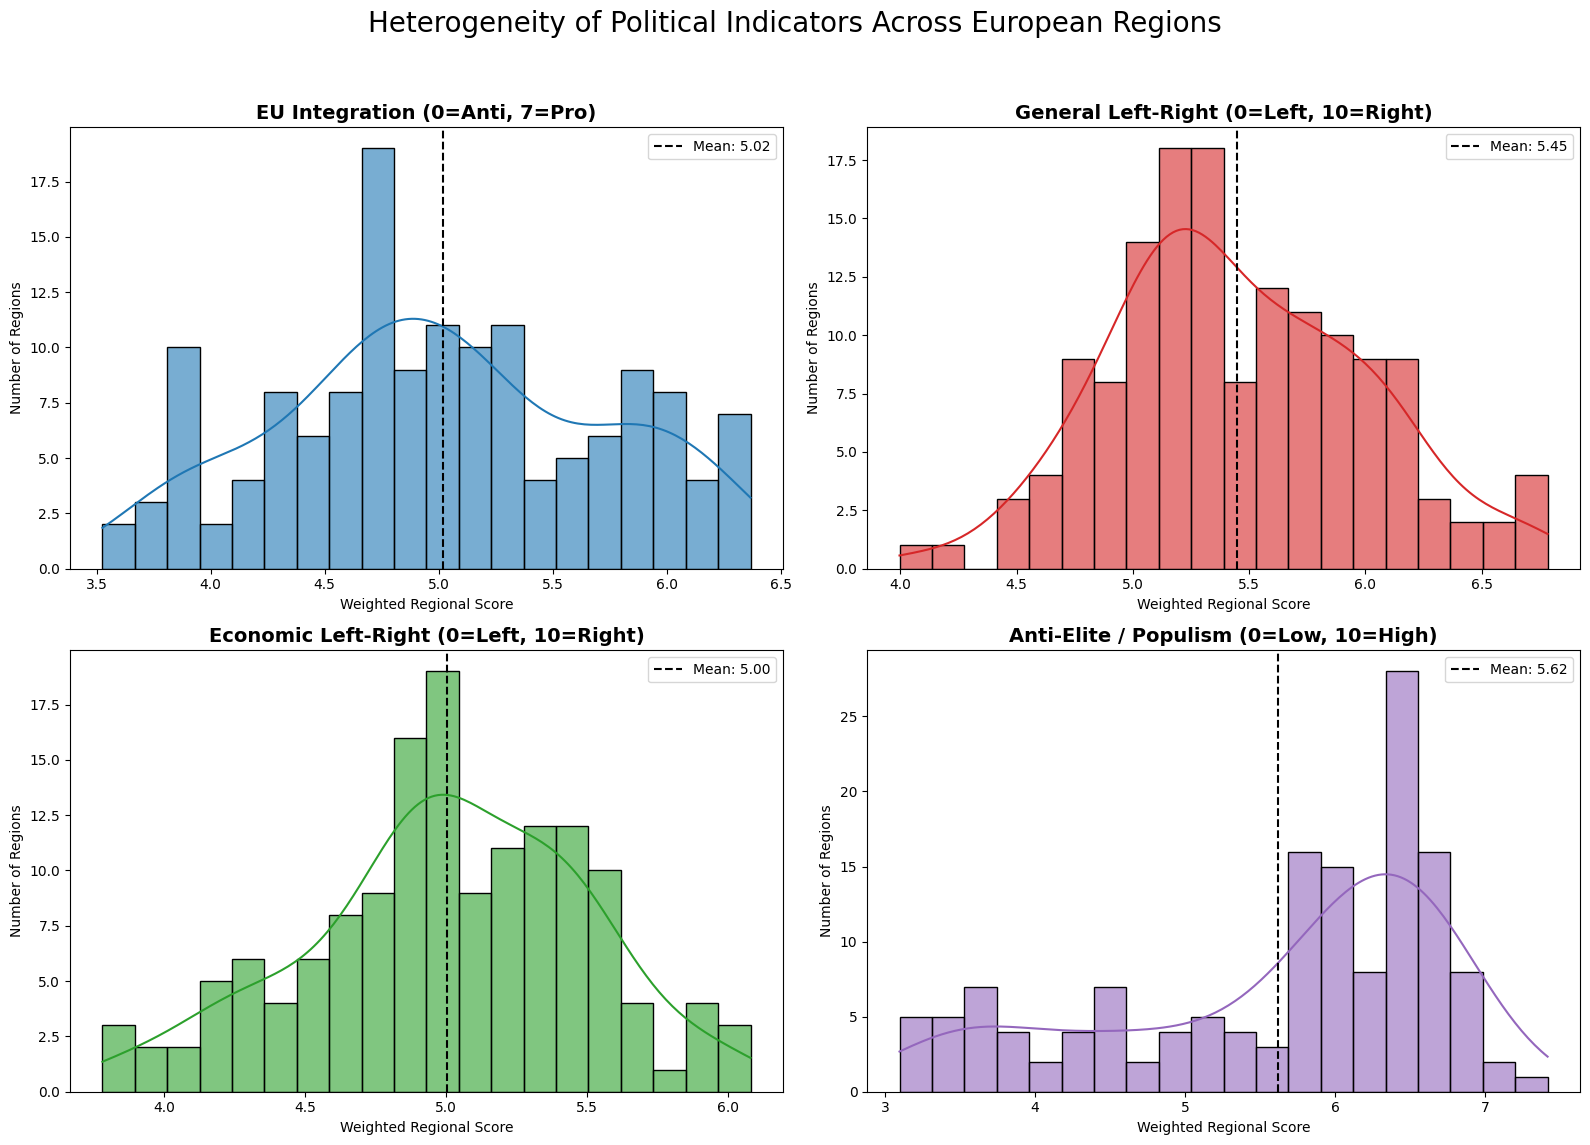

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Heterogeneity of Political Indicators Across European Regions', fontsize=20)
axes = axes.flatten()

# The variables we want to plot
indicators = [
    ('eu_position_weighted', 'EU Integration (0=Anti, 7=Pro)'),
    ('lrgen_weighted', 'General Left-Right (0=Left, 10=Right)'),
    ('lrecon_weighted', 'Economic Left-Right (0=Left, 10=Right)'),
    ('people_vs_elite_weighted', 'Anti-Elite / Populism (0=Low, 10=High)')
]

colors = ['#1f77b4', '#d62728', '#2ca02c', '#9467bd'] # Blue, Red, Green, Purple

for i, (col, title) in enumerate(indicators):
    ax = axes[i]
    
    # Check if we have data (handle the populism missing data case)
    data_to_plot = final_regional_data[col].dropna()
    
    if len(data_to_plot) > 0:
        # Plot Histogram with Kernel Density Estimate (Smooth line)
        sns.histplot(data_to_plot, kde=True, ax=ax, color=colors[i], bins=20, edgecolor='black', alpha=0.6)
        
        # Add mean line
        mean_val = data_to_plot.mean()
        ax.axvline(mean_val, color='k', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
        
        ax.set_title(title, fontsize=14, fontweight='bold')
        ax.set_xlabel('Weighted Regional Score')
        ax.set_ylabel('Number of Regions')
        ax.legend()
    else:
        ax.text(0.5, 0.5, 'Insufficient Data', ha='center', va='center', transform=ax.transAxes)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()

## Conecting V-Party

In [60]:
vparty = pd.read_csv("./datasets/clean/v-party-clean.csv")

In [61]:
vparty.head(2)

,v2paenname,v2pashname,pf_party_id,country_name,country_text_id,year,v2xpa_popul,v2pagovsup,v2pariglef,v2pariglef_nr
0,Farmers' League / Centre Party,B/C,199.0,Sweden,SWE,2002,0.116,3.0,0.796,4.0
1,Farmers' League / Centre Party,B/C,199.0,Sweden,SWE,2006,0.116,1.0,0.796,4.0


In [62]:
vparty.columns

Index(['v2paenname', 'v2pashname', 'pf_party_id', 'country_name',
       'country_text_id', 'year', 'v2xpa_popul', 'v2pagovsup', 'v2pariglef',
       'v2pariglef_nr'],
      dtype='object')

In [63]:
vparty.describe()

,pf_party_id,year,v2xpa_popul,v2pagovsup,v2pariglef,v2pariglef_nr
count,920.000000,920.000000,802.000000,798.000000,802.000000,802.000000
mean,1431.413043,2009.954348,0.358577,1.951128,0.026054,4.495012
std,1602.454383,5.738221,0.265026,1.231688,1.457827,1.365017
min,4.000000,2000.000000,0.019000,0.000000,-4.106000,1.000000
25%,495.000000,2005.000000,0.120250,1.000000,-0.923000,4.000000
50%,1044.000000,2010.000000,0.293000,3.000000,0.176000,4.000000
75%,1617.000000,2015.000000,0.536500,3.000000,1.170000,5.000000
max,8058.000000,2019.000000,0.983000,4.000000,4.174000,8.000000


In [64]:
vparty = vparty.rename(columns={"year" : "year_vparty"})

In [65]:
unique_party_elections

,partyfacts_id,year_elec
0,1898.0,2012
1,496.0,2012
2,5953.0,2012
3,4363.0,2012
4,433.0,2012
...,...,...
4150,3099.0,2018
4151,3114.0,2018
4152,6131.0,2018
4153,6132.0,2018


In [ ]:
vparty_patch = {
    # ------- CHES FIXES --------
    "FIDESZ-KDNP": 1691,           # HU: Map to Fidesz
    "USL": 120,                    # RO: Coalition, Map to PSD
    "KUKURIKU": 1475,              # HR: Coalition, Map to SDP
    "UNITY": 1408,                 # HU: Coalition, Map to MSZP
    "SVP - PATT": 1369,            # IT: Mapped to SVP
    "IL POPOLO DELLA LIBERTA'": 1626, # IT: Mapped to FI
    "LITHUANIAN PEASANT AND GREENS UNION": 1490, # LI
    "ARD": 1715,                   # RO: Coalition, Map to PDL
    "DIE FREIHEITLICHEN": 463,     # ITA: Very close to FPO in AUT
    "FORZA ITALIA": 1626,          # ITA: Forza Italia CHES fix
    "NA!": 1704,                   # LAT: CHES code fix
    "CD&V": 604,                   # BEL: CHES code fix

    1475: 
}

for abbr, new_id in ches_patch.items():
    df.loc[df['party_abbreviation'] == abbr, 'partyfacts_id'] = new_id

df.loc[(df['party_abbreviation'] == "LR") & (df['country'] == "France"), 'partyfacts_id'] = 1595 # LR in France remapped to match CHES

In [66]:
# --- STEP 2: CROSS-MERGE WITH VPARTY ---
# We merge on partyfacts_id. This creates a row for every available Vparty year for that party.
#   Example: If Party A ran in 2012, and Vparty has data for 2010, 2014, 2019...
#   This step creates 3 rows for that one election.
merged_candidates_vparty = pd.merge(
    unique_party_elections,
    vparty,
    left_on='partyfacts_id',
    right_on='pf_party_id',
    how='inner' # We only care about parties that exist in Vparty
)

In [67]:
merged_candidates_vparty

,partyfacts_id,year_elec,v2paenname,v2pashname,pf_party_id,country_name,country_text_id,year_vparty,v2xpa_popul,v2pagovsup,v2pariglef,v2pariglef_nr
0,433.0,2012,National Front,FN,433.0,France,FRA,2002,0.713,3.0,1.219,3.0
1,433.0,2012,National Front,FN,433.0,France,FRA,2012,0.770,3.0,0.025,4.0
2,433.0,2012,National Front,FN,433.0,France,FRA,2017,0.770,3.0,0.382,4.0
3,1478.0,2012,Socialist Party,PS,1478.0,France,FRA,2002,0.347,3.0,-1.213,3.0
4,1478.0,2012,Socialist Party,PS,1478.0,France,FRA,2007,0.401,3.0,-1.058,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1885,3098.0,2018,Party of Miro Cerar / Modern Center Party,SMC,3098.0,Slovenia,SVN,2014,0.196,0.0,-0.044,4.0
1886,3098.0,2018,Party of Miro Cerar / Modern Center Party,SMC,3098.0,Slovenia,SVN,2018,0.172,1.0,-0.044,4.0
1887,3114.0,2018,Alliance of Alenka Bratusek,ZaAB,3114.0,Slovenia,SVN,2018,0.201,1.0,0.007,4.0
1888,6131.0,2018,The Left,L,6131.0,Slovenia,SVN,2018,0.674,2.0,-1.486,4.0


In [68]:
### THEY RECOMMEND TO REMOVE ALL INPUTS WITH LESS THAN 5 RATERS, BUT ONLY IMPROTANT FOR L/R INDEX

merged_candidates_vparty["v2pariglef_nr"].value_counts()

v2pariglef_nr
4.0    632
5.0    621
3.0    290
7.0    149
6.0     55
8.0     48
2.0     42
1.0     30
Name: count, dtype: int64

In [69]:
# --- STEP 3: CALCULATE DISTANCE & FILTER ---
# Calculate the time gap
merged_candidates_vparty['diff'] = (merged_candidates_vparty['year_elec'] - merged_candidates_vparty['year_vparty']).abs()

# Sort by (Party, Election Year) and then by (Diff)
# If there is a tie (e.g. 2 years away in both directions), this picks the first one.
merged_candidates_vparty.sort_values(by=['partyfacts_id', 'year_elec', 'diff'], inplace=True)

# Keep only the single closest match for each party-election pair
lookup_table_vparty = merged_candidates_vparty.drop_duplicates(subset=['partyfacts_id', 'year_elec'], keep='first')

# Cleanup: Select only the columns we actually want to merge back
# We keep 'year_elec' and 'partyfacts_id' as keys, plus the CHES variables
cols_to_keep_vparty = ['partyfacts_id', 'year_elec', 'v2xpa_popul', 'v2pagovsup', 'v2pariglef', 'v2pariglef_nr', 'year_vparty']
lookup_table_vparty = lookup_table_vparty[cols_to_keep_vparty]

In [70]:
# --- STEP 4: MERGE BACK TO MASTER DATASET ---
# Now we map this clean lookup table back to the huge regional file
df_final_vparty = pd.merge(
    master_election_df,
    lookup_table_vparty,
    left_on=['partyfacts_id', 'year'],
    right_on=['partyfacts_id', 'year_elec'],
    how='left' # Keep all election results, even if VPARTY is missing (we need them for coverage ratio)
)

# Drop the redundant 'year_elec' column
df_final_vparty.drop(columns=['year_elec'], inplace=True)

In [71]:
df_final_vparty

,country,year,Region_ID,partyfacts_id,party_abbreviation,party_english,partyvote,valid_vote_agg,v2xpa_popul,v2pagovsup,v2pariglef,v2pariglef_nr,year_vparty
0,France,2012,FR10,1898.0,AUT,other,22524.0,3890489.0,NaN,NaN,NaN,NaN,NaN
1,France,2012,FR10,496.0,CEN,NaN,86586.0,3890489.0,NaN,NaN,NaN,NaN,NaN
2,France,2012,FR10,5953.0,ECO,Ecology Today,14001.0,3890489.0,NaN,NaN,NaN,NaN,NaN
3,France,2012,FR10,4363.0,FG,Left Front,332971.0,3890489.0,NaN,NaN,NaN,NaN,NaN
4,France,2012,FR10,433.0,FN,National Front / National Rally,396094.0,3890489.0,0.770,3.0,0.025,4.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,Sweden,2018,SE,690.0,M,General Electoral League / The Right / Right W...,1284698.0,6476725.0,0.099,3.0,2.277,4.0,2018.0
4226,Sweden,2018,SE,830.0,VP,Left Party / Communist Party,518454.0,6476725.0,0.593,3.0,-1.886,4.0,2018.0
4227,Sweden,2018,SE,1274.0,FP,Liberal People's Party / The Liberals,355546.0,6476725.0,0.111,2.0,1.170,4.0,2018.0
4228,Sweden,2018,SE,1887.0,OTHER,other,99137.0,6476725.0,NaN,NaN,NaN,NaN,NaN


In [72]:
# --- DIAGNOSTICS ---
print("Total rows in master:", len(master_election_df))
print("Total rows in final:", len(df_final_vparty)) # Should match exactly
print("Rows with missing Vparty scores:", df_final_vparty['v2xpa_popul'].isna().sum())
df_final_vparty['match_lag'] = df_final_vparty['year'] - df_final_vparty['year_vparty']
print(df_final_vparty['match_lag'].abs().value_counts().sort_index())

Total rows in master: 4230
Total rows in final: 4230
Rows with missing Vparty scores: 1892
match_lag
0.0     2092
1.0        7
2.0        7
3.0       50
4.0      102
5.0       41
6.0        4
7.0       22
8.0       14
9.0        5
10.0       3
12.0      32
16.0       2
Name: count, dtype: int64


In [73]:
df_final_vparty["vote_share"] = df_final_vparty["partyvote"] / df_final_vparty["valid_vote_agg"]

In [74]:
# 1. Isolate the missing rows
missing_vparty = df_final_vparty[df_final_vparty['v2xpa_popul'].isna()].copy()

# 2. Check the size of these missing parties (Are they irrelevant small parties?)
print("--- Vote Share Distribution of Missing Parties ---")
print(missing_vparty['vote_share'].describe())

# 3. Top Missing Parties (Who are they?)
# We group by party ID and average their vote share to see if major actors are missing
top_missing_vparty = missing_vparty.groupby(['partyfacts_id', 'party_abbreviation'])['vote_share'].mean().sort_values(ascending=False).head(10)
print("\n--- Top Missing Parties by Vote Share ---")
print(top_missing_vparty)

# 4. Check for 'Country-Year' gaps (Is an entire election missing?)
# This checks if specific elections were totally skipped by the merge
missing_elections_vparty = missing_vparty.groupby(['Region_ID', 'year'])['vote_share'].sum().sort_values(ascending=False).head(10)
print("\n--- Vote Share of Missing Data per Election (High % means the whole election is likely missing) ---")
print(missing_elections_vparty)

--- Vote Share Distribution of Missing Parties ---
count    1892.000000
mean        0.023898
std         0.036785
min         0.000000
25%         0.005571
50%         0.013627
75%         0.028877
max         0.484975
Name: vote_share, dtype: float64

--- Top Missing Parties by Vote Share ---
partyfacts_id  party_abbreviation           
1431.0         HDZ                              0.343501
1475.0         KUKURIKU                         0.282310
1369.0         SVP - PATT                       0.244490
               SVP                              0.223011
4094.0         EKRE                             0.128636
6242.0         VALLEE D'AOSTE                   0.127113
548.0          UNION VALDOTAINE PROGRESSISTE    0.125833
604.0          CD&V                             0.100603
2415.0         AUTONOMIE LIBERTE' DEMOCRATIE    0.099194
7909.0         KIN.AL.                          0.090699
Name: vote_share, dtype: float64

--- Vote Share of Missing Data per Election (High % mean

## Constructing weighted indicators for V-party

In [75]:
INDICATORS_VPARTY = ["v2xpa_popul", "v2pagovsup", "v2pariglef"]

# --- STEP 1: CALCULATE REGIONAL SCORES & COVERAGE PER ELECTION ---
election_scores_list_vparty = []

for ind in INDICATORS_VPARTY:
    # 1. Filter to valid parties for this specific indicator
    valid_data_vparty = df_final_vparty.dropna(subset=[ind])
    
    if valid_data_vparty.empty:
        continue

    # 2. Group by Region/Year and calculate stats
    stats_vparty = valid_data_vparty.groupby(['Region_ID', 'year'])[[ind, 'vote_share']].apply(
        lambda x: get_weighted_stats(x, ind, 'vote_share')
    ).reset_index()
    
    # Rename columns for clarity
    stats_vparty.rename(columns={'score': ind, 'coverage': f'{ind}_vote_coverage'}, inplace=True)
    
    # Set multi-index for easy merging later
    stats_vparty.set_index(['Region_ID', 'year'], inplace=True)
    election_scores_list_vparty.append(stats_vparty)

# Merge all indicator stats into one dataframe
election_scores_vparty = pd.concat(election_scores_list_vparty, axis=1).reset_index()

In [76]:
# --- STEP 2: CALCULATE DURATION ---
election_scores_vparty = election_scores_vparty.sort_values(['Region_ID', 'year'])
election_scores_vparty['next_year'] = election_scores_vparty.groupby('Region_ID')['year'].shift(-1)
election_scores_vparty['next_year'] = election_scores_vparty['next_year'].fillna(DATA_END_YEAR)
election_scores_vparty['duration'] = election_scores_vparty['next_year'] - election_scores_vparty['year']

In [77]:
# --- STEP 3: AGGREGATE OVER TIME (CORRECTED) ---
final_regional_data_vparty = pd.DataFrame(index=election_scores_vparty['Region_ID'].unique())
final_regional_data_vparty.index.name = 'Region_ID'

for ind in INDICATORS_VPARTY:
    # Filter for valid elections for this indicator
    valid_elections_vparty = election_scores_vparty.dropna(subset=[ind])
    
    # Define the aggregation function
    def time_weighted_agg(x):
        # x is now a DataFrame containing only the columns we selected below
        total_duration_vparty = x['duration'].sum()
        if total_duration_vparty == 0: 
            return pd.Series([np.nan, 0.0], index=['score', 'coverage'])
        
        # 1. Time-Weighted Score
        weighted_score_vparty = (x[ind] * x['duration']).sum() / total_duration_vparty
        
        # 2. Time-Weighted Coverage 
        weighted_coverage_vparty = (x[f'{ind}_vote_coverage'] * x['duration']).sum() / total_duration_vparty
        
        return pd.Series([weighted_score_vparty, weighted_coverage_vparty], index=['score', 'coverage'])

    cols_needed_vparty = ['duration', ind, f'{ind}_vote_coverage']
    
    agg_results_vparty = valid_elections_vparty.groupby('Region_ID')[cols_needed_vparty].apply(time_weighted_agg)
    
    # Assign columns to the final dataframe
    final_regional_data_vparty[f'{ind}_weighted'] = agg_results_vparty['score']
    final_regional_data_vparty[f'{ind}_coverage'] = agg_results_vparty['coverage']

In [78]:
# --- VIEW RESULTS ---
# Show top 5 regions
final_regional_data_vparty

,v2xpa_popul_weighted,v2xpa_popul_coverage,v2pagovsup_weighted,v2pagovsup_coverage,v2pariglef_weighted,v2pariglef_coverage
Region_ID,,,,,,
AT,0.331800,0.965280,1.570333,0.965280,0.598531,0.965280
BE,0.312126,0.767292,1.835121,0.767292,0.224623,0.767292
BE1,0.192366,0.738329,1.621079,0.738329,-0.523077,0.738329
BE2,0.403006,0.791522,2.069075,0.791522,0.898494,0.791522
BE3,0.151687,0.725805,1.417581,0.725805,-1.033727,0.725805
...,...,...,...,...,...,...
SE31,0.364086,0.900493,1.765076,0.900493,0.316396,0.900493
SE32,0.354868,0.883999,1.670840,0.883999,0.120529,0.883999
SE33,0.361137,0.911043,1.711429,0.911043,-0.080345,0.911043


In [84]:
final_regional_data_vparty[["v2xpa_popul_weighted", "v2pagovsup_weighted"]].to_csv("./datasets/clean/vparty_regional.csv", index=True)

In [79]:
# DIAGNOSTIC: Check data quality
print("\n--- Data Quality Check (Average Coverage across all regions) ---")
print(final_regional_data_vparty[[f'{i}_coverage' for i in INDICATORS_VPARTY]].mean())


--- Data Quality Check (Average Coverage across all regions) ---
v2xpa_popul_coverage    0.867125
v2pagovsup_coverage     0.866707
v2pariglef_coverage     0.867125
dtype: float64


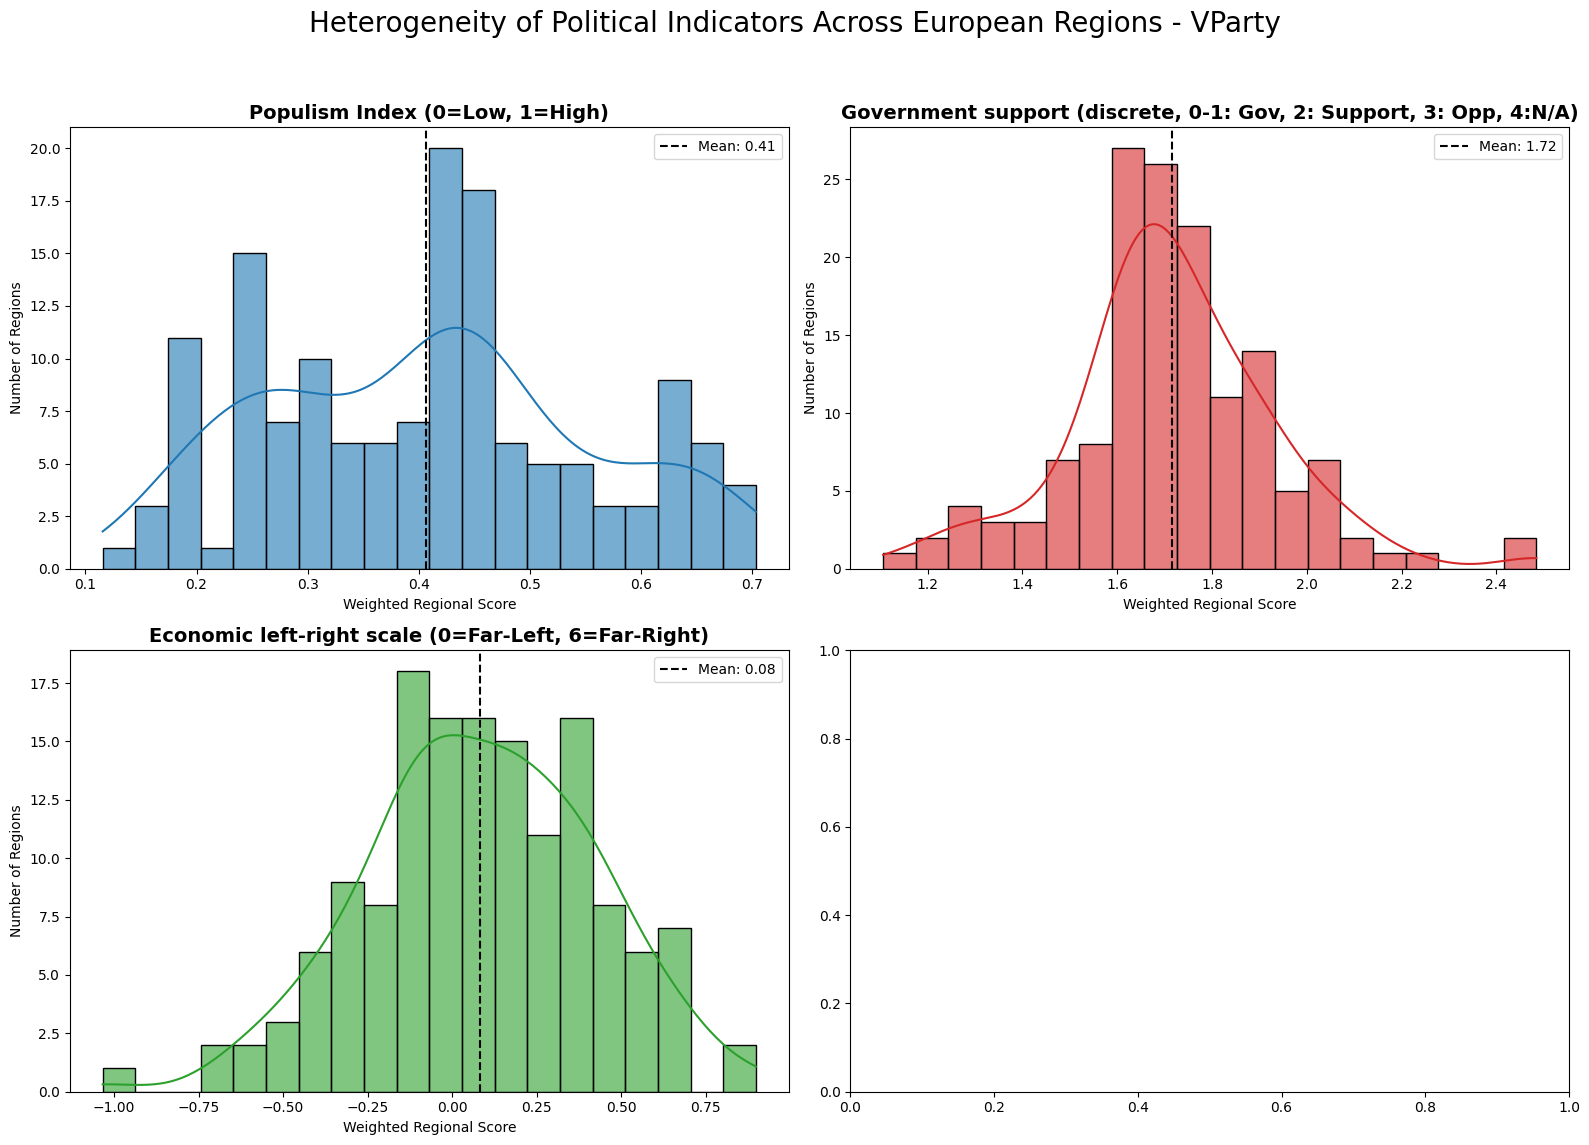

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Heterogeneity of Political Indicators Across European Regions - VParty', fontsize=20)
axes = axes.flatten()

# The variables we want to plot
indicators_vparty = [
    ('v2xpa_popul_weighted', 'Populism Index (0=Low, 1=High)'),
    ('v2pagovsup_weighted', 'Government support (discrete, 0-1: Gov, 2: Support, 3: Opp, 4:N/A)'),
    ('v2pariglef_weighted', 'Economic left-right scale (0=Far-Left, 6=Far-Right)'),
]

colors = ['#1f77b4', '#d62728', '#2ca02c', '#9467bd'] # Blue, Red, Green, Purple

for i, (col, title) in enumerate(indicators_vparty):
    ax = axes[i]
    
    # Check if we have data (handle the populism missing data case)
    data_to_plot = final_regional_data_vparty[col].dropna()
    
    if len(data_to_plot) > 0:
        # Plot Histogram with Kernel Density Estimate (Smooth line)
        sns.histplot(data_to_plot, kde=True, ax=ax, color=colors[i], bins=20, edgecolor='black', alpha=0.6)
        
        # Add mean line
        mean_val = data_to_plot.mean()
        ax.axvline(mean_val, color='k', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
        
        ax.set_title(title, fontsize=14, fontweight='bold')
        ax.set_xlabel('Weighted Regional Score')
        ax.set_ylabel('Number of Regions')
        ax.legend()
    else:
        ax.text(0.5, 0.5, 'Insufficient Data', ha='center', va='center', transform=ax.transAxes)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()